In [241]:
import pandas as pd
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.interpolate import interpolate_to_grid
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
from metpy.plots import USCOUNTIES
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors

In [242]:
def create_nonlinear_cmap(cmap_name, levels, colors):
    num_levels = len(levels)
    segments = [(levels[i] / max(levels), colors[i], 'linear') for i in range(num_levels)]
    cmap = LinearSegmentedColormap.from_list(cmap_name, segments)
    return cmap

In [243]:
df = pd.read_csv('lsr_202305010000_202305030000.csv')

for index, row in df.iterrows():
    if row['TYPECODE'] != 'S':
        df = df.drop(index)
df = df.reset_index(drop=True)

print(df)

df['MAG'] = pd.to_numeric(df['MAG'])

            VALID            VALID2    LAT    LON   MAG  WFO TYPECODE  \
0    202305010930  2023/05/01 09:30  46.41 -87.75   7.0  MQT        S   
1    202305011022  2023/05/01 10:22  46.46 -90.16  14.3  MQT        S   
2    202305011030  2023/05/01 10:30  46.50 -87.61   5.0  MQT        S   
3    202305011030  2023/05/01 10:30  46.41 -87.76   8.3  MQT        S   
4    202305011043  2023/05/01 10:43  46.74 -88.50   2.5  MQT        S   
..            ...               ...    ...    ...   ...  ...      ...   
105  202305022233  2023/05/02 22:33  46.46 -90.16   3.6  MQT        S   
106  202305022235  2023/05/02 22:35  46.83 -87.75  18.8  MQT        S   
107  202305022300  2023/05/02 23:00  46.68 -85.62   2.0  MQT        S   
108  202305022300  2023/05/02 23:00  46.57 -85.59   6.0  MQT        S   
109  202305022346  2023/05/02 23:46  46.31 -85.57   3.0  MQT        S   

    TYPETEXT                 CITY     COUNTY STATE           SOURCE  \
0       SNOW   5 SW NATIONAL MINE  MARQUETTE    MI  

In [244]:
lon_min, lon_max = df['LON'].min(), df['LON'].max()
lat_min, lat_max = df['LAT'].min(), df['LAT'].max()

grid_lon, grid_lat = np.meshgrid(np.linspace(lon_min, lon_max, 100), np.linspace(lat_min, lat_max, 100))
grid_points = np.column_stack((grid_lon.ravel(), grid_lat.ravel()))


grid_snow = interpolate_to_grid(df['LON'], df['LAT'], df['MAG'], interp_type='cressman')

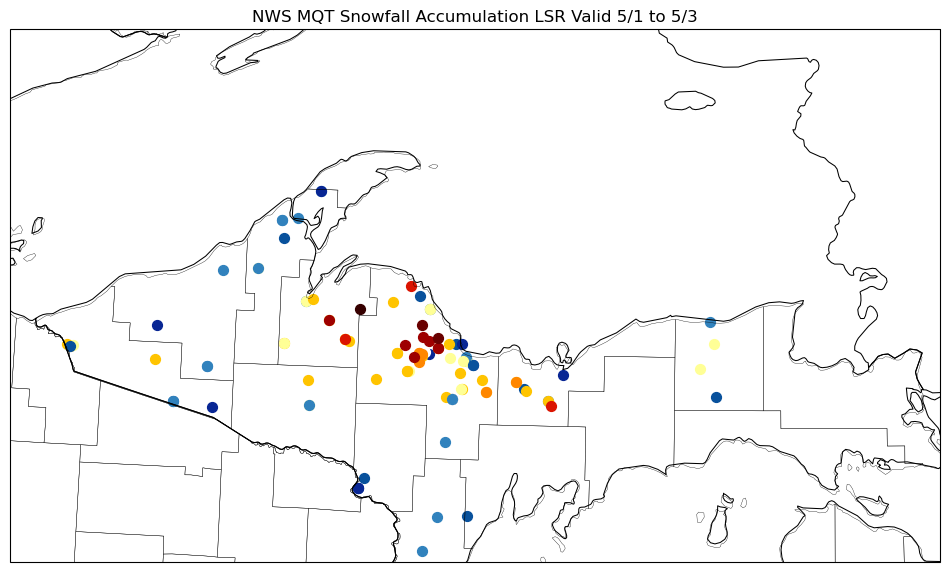

In [245]:
crs = ccrs.LambertConformal(central_longitude=-85, central_latitude=40)
datacrs = ccrs.PlateCarree() 

fig = plt.figure(figsize=(12,9))

ax = fig.add_subplot(1,1,1, projection=crs)
ax.set_extent([-90.5, -84.0, 45.5, 48], datacrs)
ax.add_feature(cfeature.STATES, linewidth=0.75)
ax.add_feature(USCOUNTIES.with_scale('5m'), linewidth=0.25)

#for index, row in df.iterrows():
#    if row['MAG'] > 1:
#        plt.annotate(f"{row['MAG']:.2f}", (row['LON'], row['LAT']), color='black', ha='center', va='center', transform=datacrs)


for index, row in df.iterrows():
    mag = row['MAG']
    if 1 <= mag < 2:
        color = '#BDD7E7'
    elif 2 <= mag < 3:
        color = '#3182BD'
    elif 3 <= mag < 4:
        color = '#08519C'
    elif 4 <= mag < 6:
        color = '#082694'
    elif 6 <= mag < 8:
        color = '#FFFF96'
    elif 8 <= mag < 10:
        color = '#FFC400'
    elif 10 <= mag < 15:
        color = '#FFC400'
    elif 15 <= mag < 18:
        color = '#FF8700'
    elif 18 <= mag < 24:
        color = '#DB1400'
    elif 24 <= mag < 30:
        color = '#9E0000'
    elif 30 <= mag <= 36:
        color = '#690000'
    elif mag > 36:
        color = '#360000'
    else:
        color = 'white'  # Default color for out of range values

    sc = plt.scatter(row['LON'], row['LAT'], color=color, s=50, transform=datacrs)

plt.title('NWS MQT Snowfall Accumulation LSR Valid 5/1 to 5/3')
plt.show()